# IMPORT LIBRARIES

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#**Part 1: Data Loading and Preprocessing**

 # Load the Dataset

In [10]:
# Load the dataset
df = pd.read_csv('onlinefoods.csv')

#Handle missing values

In [33]:
missing_values = df.isnull().sum()
print(missing_values)

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


# Encode Categorical Variables

In [35]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Marital Status', 'Occupation', 'Feedback'], drop_first=True)
print(df_encoded.head())

   Age  Monthly Income Educational Qualifications  Family size  latitude  \
0   20       No Income              Post Graduate            4   12.9766   
1   24  Below Rs.10000                   Graduate            3   12.9770   
2   22  Below Rs.10000              Post Graduate            3   12.9551   
3   22       No Income                   Graduate            6   12.9473   
4   22  Below Rs.10000              Post Graduate            4   12.9850   

   longitude  Pin code Output Unnamed: 12  Gender_Male  \
0    77.5993    560001    Yes         Yes            0   
1    77.5773    560009    Yes         Yes            0   
2    77.6593    560017    Yes         Yes            1   
3    77.5616    560019    Yes         Yes            0   
4    77.5533    560010    Yes         Yes            1   

   Marital Status_Prefer not to say  Marital Status_Single  \
0                                 0                      1   
1                                 0                      1   
2       


#Feature Selection

In [36]:
features = ['Age', 'Gender', 'Marital Status', 'Occupation','Monthly Income']
target = 'Feedback'

# Part 2: Exploratory Data Analysis (EDA)

#Descriptive Statistics

In [19]:
numeric = df.describe()
print(numeric.describe())

              Age  Family size    latitude   longitude       Pin code
count    8.000000     8.000000    8.000000    8.000000       8.000000
mean    67.450557    51.078994   58.236834  106.710274  420085.220376
std    129.811299   136.145972  133.321261  116.853222  259152.817262
min      2.975593     1.000000    0.044489    0.051354      31.399609
25%     21.750000     1.837756   12.918975   77.545006  420097.750000
50%     24.314433     3.140464   12.974529   77.596130  560022.125000
75%     27.750000     4.500000   13.023269   77.662725  560047.085052
max    388.000000   388.000000  388.000000  388.000000  560109.000000


#Visualizations

# Distribution of Age and its impact on Feedback

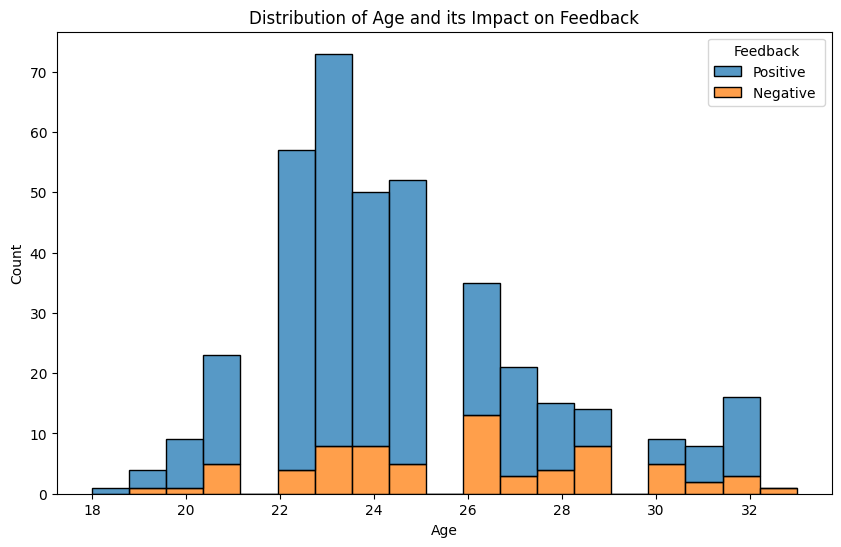

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Feedback', multiple='stack')
plt.title('Distribution of Age and its Impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Proportions of Feedback across different levels of Monthly Income

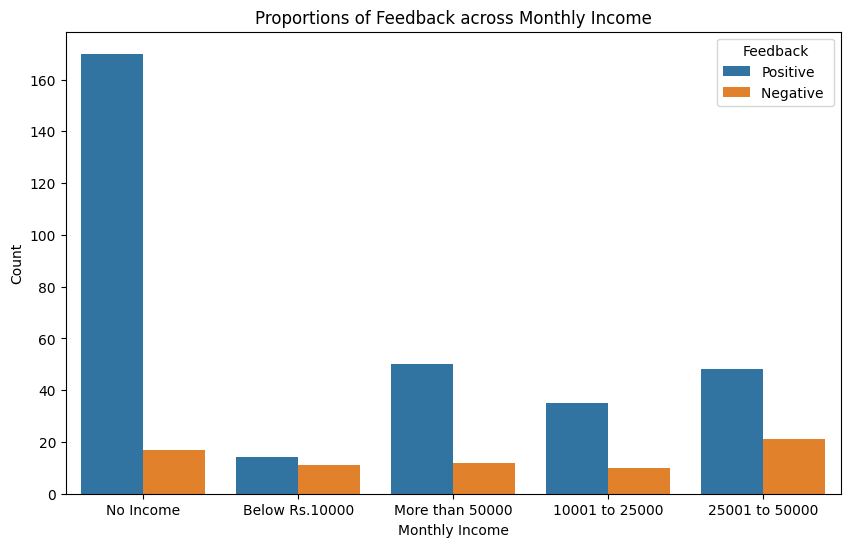

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monthly Income', hue='Feedback')
plt.title('Proportions of Feedback across Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

# Correlation matrix heatmap

<ipython-input-44-1b3bcdc19786>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


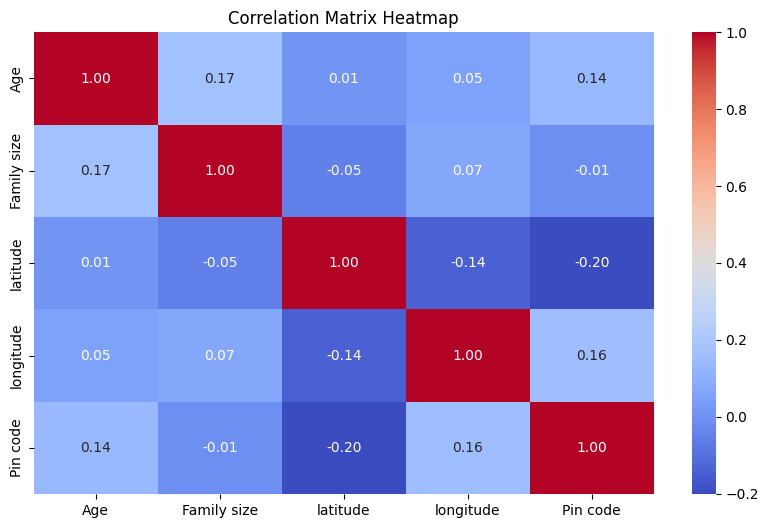

In [44]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

#Part 3: Logistic Regression Model

#Build the Model

In [50]:
X = df[['Family size','Educational Qualifications']]
X_encoded = pd.get_dummies(X, columns=['Educational Qualifications'], drop_first=True)
y = df['Monthly Income']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation

Accuracy: 0.5897435897435898
Classification Report:
                  precision    recall  f1-score   support

 10001 to 25000       0.00      0.00      0.00         8
 25001 to 50000       0.00      0.00      0.00         8
 Below Rs.10000       0.00      0.00      0.00         5
More than 50000       0.33      0.09      0.14        11
      No Income       0.60      0.98      0.74        46

       accuracy                           0.59        78
      macro avg       0.19      0.21      0.18        78
   weighted avg       0.40      0.59      0.46        78

Confusion Matrix:
[[ 0  0  0  0  8]
 [ 0  0  0  1  7]
 [ 0  0  0  0  5]
 [ 0  0  0  1 10]
 [ 0  0  0  1 45]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


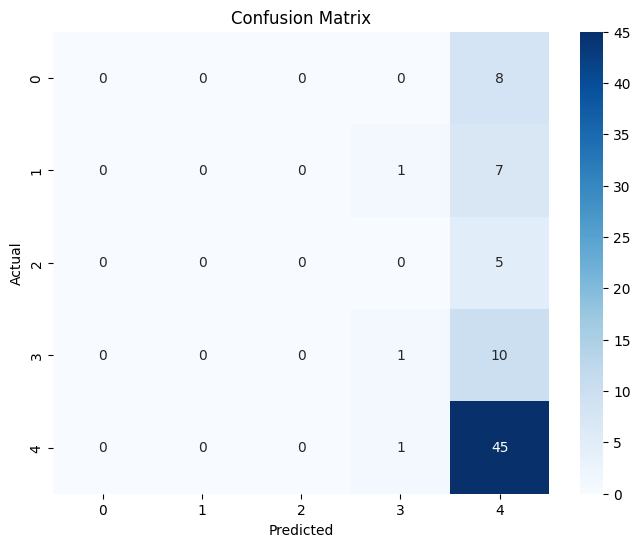

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
#Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Part 4: Data Analysis and Visualization

#Feature Importance

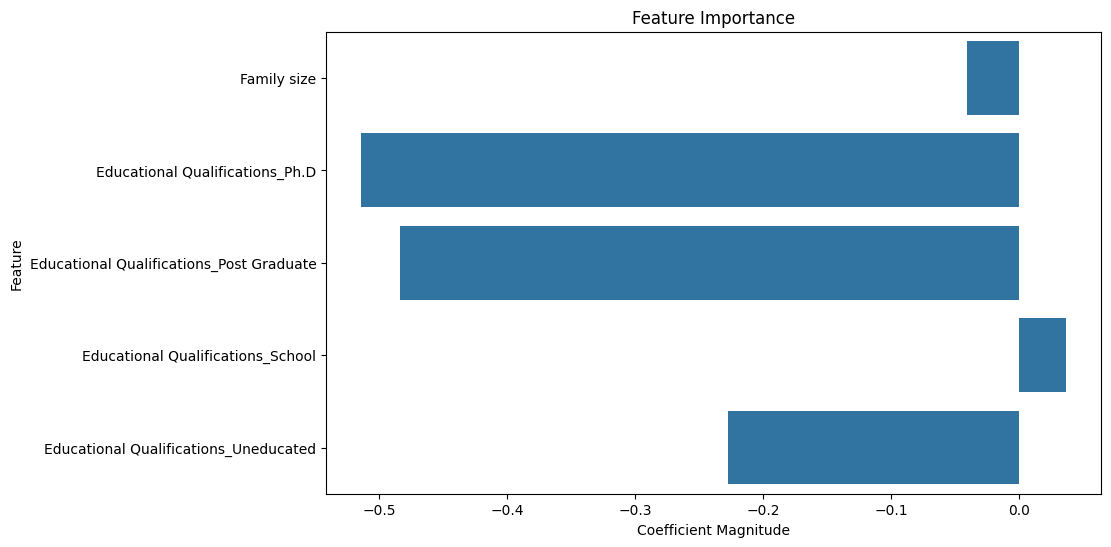

In [61]:
#Build the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#Feature Importance Analysis
coefficients = model.coef_[0]
feature_names = X_train.columns

#Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

# Feature Importance

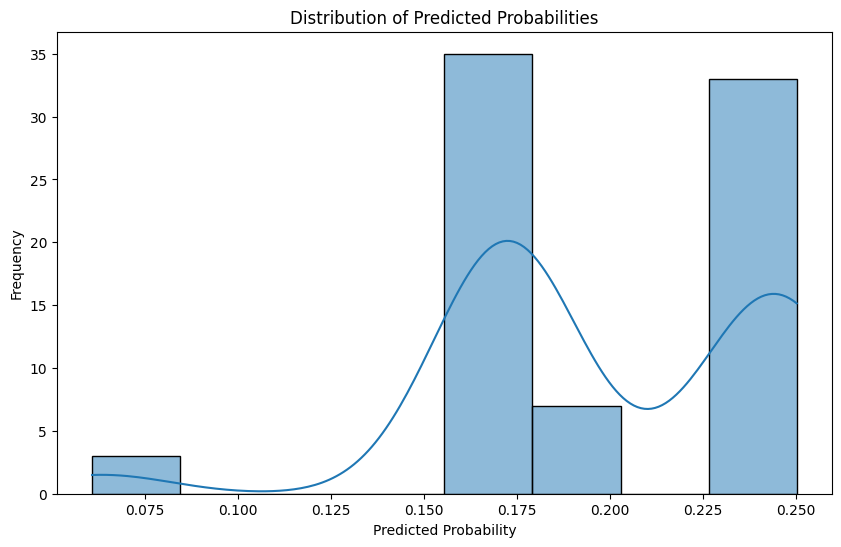

Confusion Matrix:
[[ 0  0  0  0  8]
 [ 0  0  0  1  7]
 [ 0  0  0  0  5]
 [ 0  0  0  1 10]
 [ 0  0  0  1 45]]


In [63]:
#Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
#Visualize the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()
#Confusion Matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)